 # <center> <font face='Times New' size=10> Previsão de renda </font> </center>

-----------------------------------------------------

## Sumário

   1. <b>[Entendimento do Negócio](#1)</b> <a id=18></a>
   2. <b>[Entendimento dos Dados](#4)</b>
       - 2.1 <b>[Importando as bibliotecas](#5)</b>
       - 2.2 <b>[Carregando a base dados](#6)</b>
       - 2.3 <b>[Tratando valores nulos](#7)</b>
   3. <b>[Exploração e Análise dos Dados](#8)</b>
       - 3.1 <b>[Análise Univariada](#9)</b>
       - 3.2 <b>[Análise Bivariada](#10)</b>
   4. <b>[Preparação dos Dados](#11)</b>
       - 4.1 <b>[Selecionando as variáveis](#12)</b>
   5. <b>[Modelagem](#13)</b>
       - 5.1 <b>[Regressão Linear Múltipla](#14)</b>
       - 5.2 <b>[Random Forest](#15)</b>
   6. <b>[Avaliação dos Resultados](#16)</b>
       - 6.1 <b>[Resultados](#17)</b>
       - 6.2 <b>[Avaliação](#19)</b>

-----------------------------

<img src="https://www.apaulista.org.br/wp-content/uploads/2016/11/como-investir-dinheiro.jpg" alt="some text" width=400 height=280>

## 1. Entendimento do Negócio <a id=1></a>
[back to top](#18)

<p><font size=3>Criar estimativas e elaborar um planejamento financeiro, de acordo com sua renda, faz parte de qualquer pessoa, seja física ou jurídica. Essas tarefas são importantes para definir os objetivos e as ações que devem ser tomadas.</font></p>
<p><font size=3>Ações como prever a renda de um cliente, e assim basear uma campanha de marketing, para ofecer um produto/serviço que ele tenha condições e seja mais propenso a aceitar, ou estimular um limite de concessão de crédito. Existem diversas formas de fazer uso da previsão, e como consequência, aumentar seu lucro, evitar perdas, entre outros benefícios.</font></p>

<p><font size=3>A base de dados foi retirada do <a href="https://www.kaggle.com/">Kaggle</a>.</font></p>

## 2. Entendimento dos dados <a id=4></a>
[back to top](#18)

### 2.0.1 Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência                                 |    String    |
| id_cliente              |  ID do Cliente                                      |    Integer   |
| sexo                    |  'F' = Feminino; 'M' = Masculino                    |    String    |
| posse_de_veiculo        |  False = Sem Veículo; True = Com Veículo            |    Bool      |
| posse_de_imovel         |  False = Sem Imóvel; True = Com Imóvel              |    Bool      |
| qtd_filhos              |  Quantidade de Filhos                               |    Integer   |
| tipo_renda              |  Tipo de Renda (Ex:Empresário)                      |    String    |
| educacao                |  Nível de Educação (Ex: Superior)                   |    String    |
| estado_civil            |  Estado Cívil (Ex: Solteiro)                        |    String    |
| tipo_residencia         |  Tipo de Residência (Ex: Casa)                      |    String    |
| idade                   |  Idade em anos                                      |    Integer   |
| tempo_emprego           |  Tempo de emprego                                   |    Float     |
| qt_pessoas_residencia   |  Quantidade de Pessoas na Residência                |    Integer   |
| renda                   |  Renda Mensal                                       |    Float     |

### 2.1 Importando as bibliotecas <a id=5></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error




import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")

### 2.2 Carregando a base de dados <a id=6></a>

In [56]:
df = pd.read_csv('./input/previsao_de_renda.csv')
df1 = df.copy()

#### 2.2.1 Visualizando as 5 primeiras linhas da base de dados.

In [3]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### 2.2.2 Tamanho da base de dados.

In [5]:
linhas, colunas = df.shape
print(f'O total de linhas da base de dados é: {linhas}')
print(f'O total de colunas da base de dados é: {colunas}')

O total de linhas da base de dados é: 15000
O total de colunas da base de dados é: 15


### 2.3 Tratando valores nulos <a id=7></a>

#### 2.3.1 Verificando valores nulos

In [6]:
df.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

#### 2.3.2 Dados estatísticos sobre a variável <code>tempo_emprego</code>

In [7]:
mean = df['tempo_emprego'].mean()
median = df['tempo_emprego'].median()
max_value = df['tempo_emprego'].max()
min_value = df['tempo_emprego'].min()
print(f'A média da variável tempo_emprego é de: {round(mean, 2)}')
print(f'A mediana da variável tempo_emprego é de: {round(median, 2)}')
print(50*'-')
print(f'O valor máximo da variável tempo_emprego é de: {round(max_value, 2)}')
print(f'O valor mínimo da variável tempo_emprego é de: {round(min_value, 2)}')

A média da variável tempo_emprego é de: 7.72
A mediana da variável tempo_emprego é de: 6.01
--------------------------------------------------
O valor máximo da variável tempo_emprego é de: 42.91
O valor mínimo da variável tempo_emprego é de: 0.12


#### 2.3.3 Matriz de correlação entre <code>tempo_emprego</code> e <code>renda</code>

In [8]:
df[['tempo_emprego', 'renda']].corr() 

,tempo_emprego,renda
tempo_emprego,1.000000,0.385013
renda,0.385013,1.000000


#### 2.3.4 Criando DataFrame sem valores nulos

In [9]:
df_sem_nulos = df.dropna()

#### 2.3.5 Gráficos visualizando a variável <code>renda</code>, com ou sem os valores nulos.

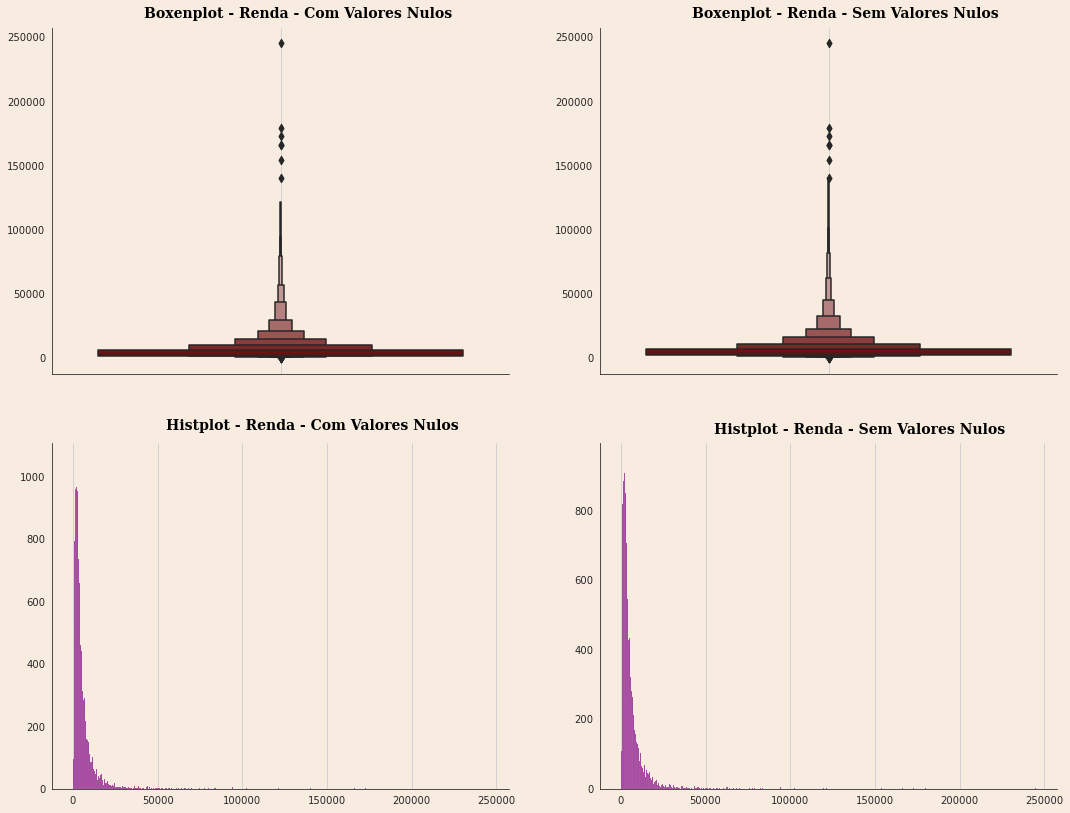

In [10]:
fig = plt.figure(figsize=(18,14))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 


ax0.spines["bottom"].set_visible(True)
ax0.spines["left"].set_visible(True)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.text(-0.3, 265000, 'Boxenplot - Renda - Com Valores Nulos', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0,data=df,y='renda',palette=color_palette)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid()

ax1.spines["bottom"].set_visible(True)
ax1.spines["left"].set_visible(True)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.text(-0.3, 265000, 'Boxenplot - Renda - Sem Valores Nulos', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,data=df_sem_nulos,y='renda',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.grid()

ax2.spines["bottom"].set_visible(True)
ax2.spines["left"].set_visible(True)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.text(55000, 1150, 'Histplot - Renda - Com Valores Nulos', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,data=df,x='renda', color='purple')
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.grid()

ax3.spines["bottom"].set_visible(True)
ax3.spines["left"].set_visible(True)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.text(55000, 1020, 'Histplot - Renda - Sem Valores Nulos', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,data=df_sem_nulos,x='renda', color='purple')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.grid()

#### Podemos chegar a conclusão, que deletar os valores nulos não afeta nossa variável resposta, a distrubuição continua a mesma.

## 3. Exploração e Análise dos Dados <a id=8></a>
[back to top](#18)

#### 3.0.1 Separando as variáveis <i>Categóricas</i>  e <i>Contínuas</i>

In [11]:
df = df.dropna()
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [12]:
cat = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'qt_pessoas_residencia']
con = ['qtd_filhos', 'idade', 'tempo_emprego']
resposta = ['renda']
print(f'Variáveis Categóricas : {cat}')
print(114*'-')
print(f'Variáveis Contínuas : {con}')
print(114*'-')
print(f'Variável Resposta : {resposta}')

Variáveis Categóricas : ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'qt_pessoas_residencia']
------------------------------------------------------------------------------------------------------------------
Variáveis Contínuas : ['qtd_filhos', 'idade', 'tempo_emprego']
------------------------------------------------------------------------------------------------------------------
Variável Resposta : ['renda']


### 3.1 Análise Univariada<a id=9></a>

#### 3.1.1 Contagem das Variáveis Categóricas

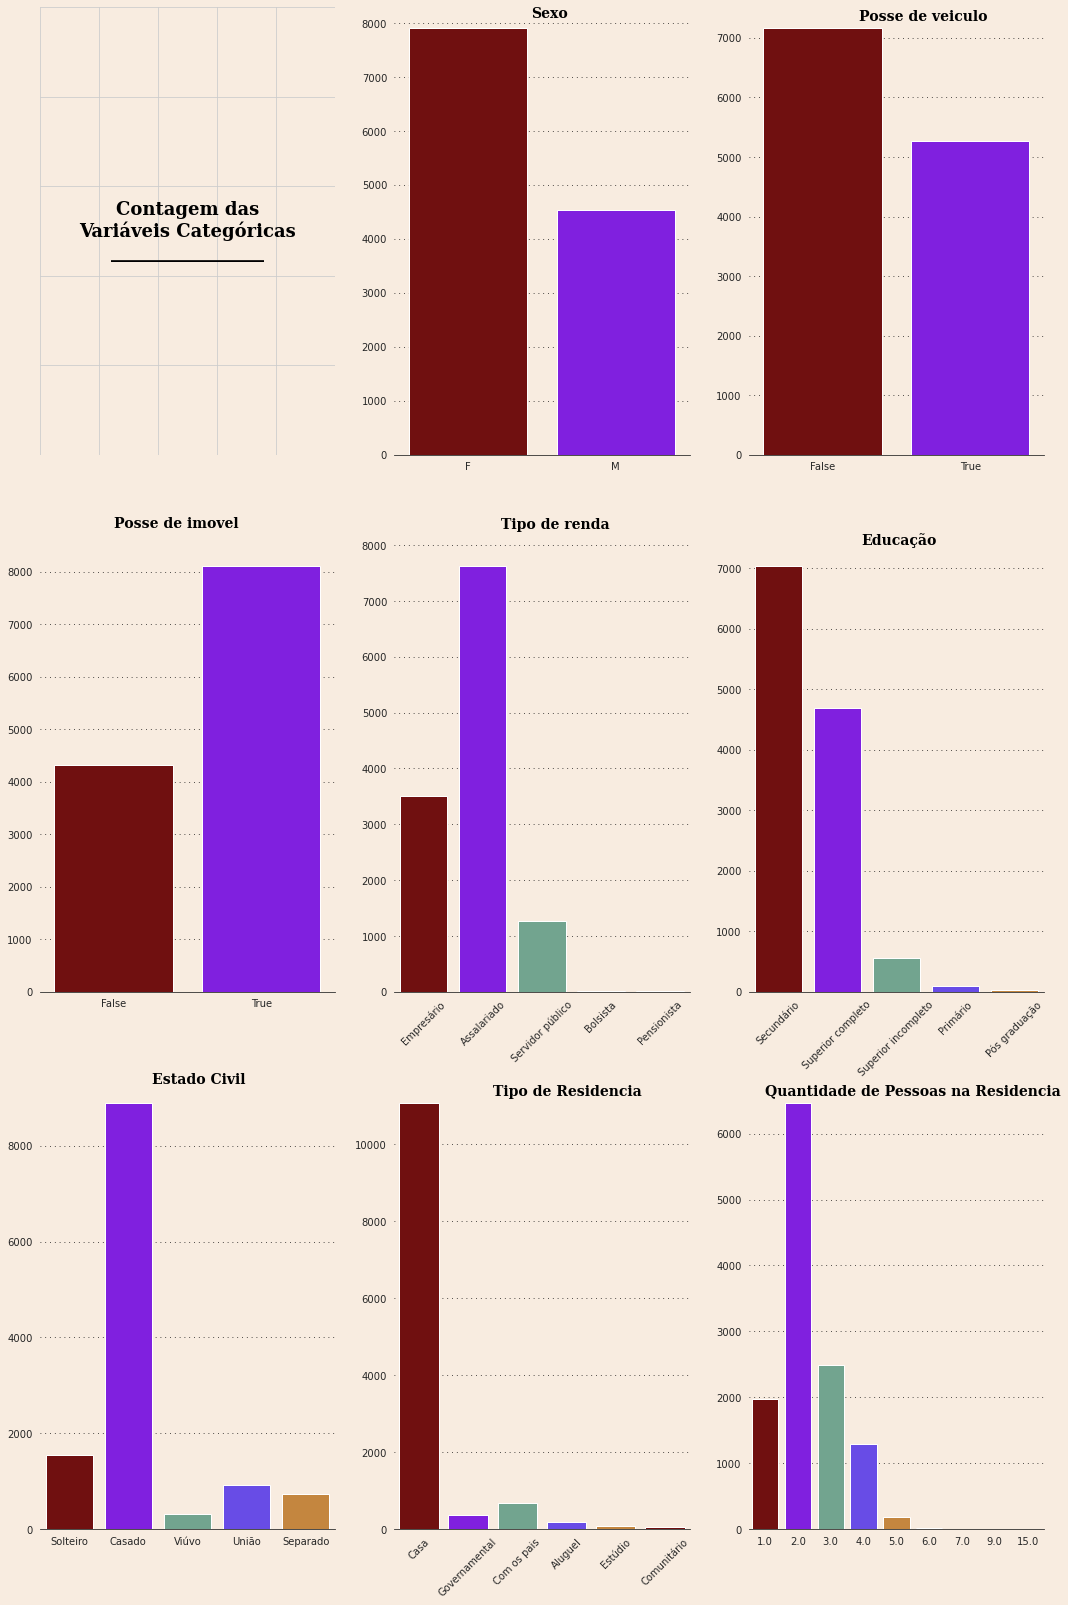

In [13]:
fig = plt.figure(figsize=(18,28))
gs = fig.add_gridspec(3,3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 


ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Contagem das\nVariáveis Categóricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.grid()

# Sexo count
ax1.text(0.43, 8100, 'Sexo', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sexo',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Posse de veiculo
ax2.text(0.25, 7300, 'Posse de veiculo', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='posse_de_veiculo',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Posse de imovel
ax3.text(0, 8850, 'Posse de imovel', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='posse_de_imovel',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Tipo de Renda
ax4.text(1.3, 8300, 'Tipo de renda', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='tipo_renda',palette=color_palette)
ax4.set_xticklabels(labels=['Empresário', 'Assalariado', 'Servidor público', 'Bolsista',
       'Pensionista'], rotation = 45)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Educação
ax5.text(1.4, 7400, 'Educação', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='educacao',palette=color_palette)
ax5.set_xticklabels(labels=['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], rotation = 45)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Estado Civil
ax6.text(1.4, 9300, 'Estado Civil', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='estado_civil',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Tipo de Residencia
ax7.text(1.5, 11250, 'Tipo de Residencia', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='tipo_residencia',palette=color_palette)
ax7.set_xticklabels(labels=['Casa', 'Governamental', 'Com os pais', 'Aluguel', 'Estúdio',
       'Comunitário'], rotation = 45)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Quantidade de Pessoas na Residencia
ax8.text(0, 6600, 'Quantidade de Pessoas na Residencia', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='qt_pessoas_residencia',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)
ax2.spines[lista].set_visible(False)
ax3.spines[lista].set_visible(False)
ax4.spines[lista].set_visible(False)
ax5.spines[lista].set_visible(False)
ax6.spines[lista].set_visible(False)
ax7.spines[lista].set_visible(False)
ax8.spines[lista].set_visible(False)

#### Contagem das Variáveis Contínuas

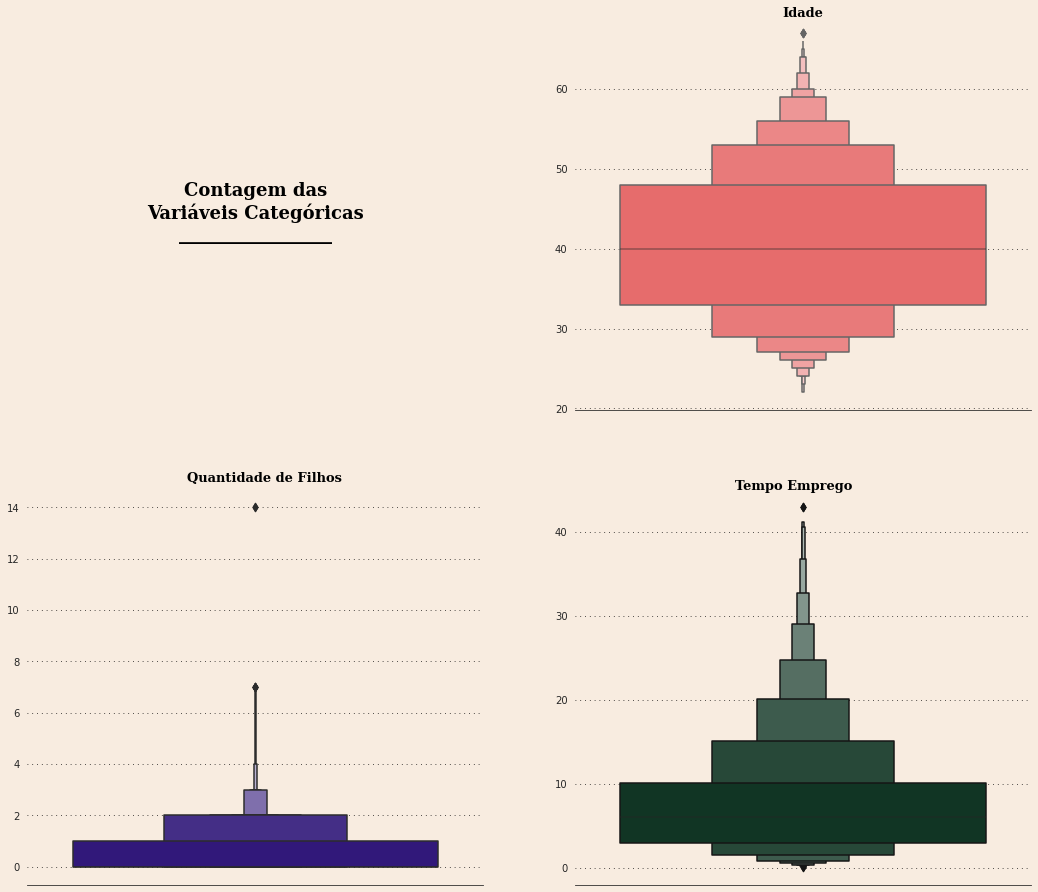

In [14]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Contagem das\nVariáveis Categóricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen Plot Idade
ax1.text(-0.045, 69, 'Idade', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1, y=df['idade'], palette=['#FA5858'])
ax1.set_xlabel('')
ax1.set_ylabel('')

# Boxen Plot 
ax2.text(-0.15, 15, 'Quantidade de Filhos', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2, y=df['qtd_filhos'], palette=['#29088A'])
ax2.set_xlabel('')
ax2.set_ylabel('')

# Boxen Plot Tempo Emprego
ax3.text(-0.15, 45, 'Tempo Emprego', fontsize=13, fontweight='bold', fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3, y=df['tempo_emprego'], palette=['#0B3B24'])
ax3.set_xlabel('')
ax3.set_ylabel('')

lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)
ax2.spines[lista].set_visible(False)
ax3.spines[lista].set_visible(False)
ax4.spines[lista].set_visible(False)
ax5.spines[lista].set_visible(False)

### 3.2 Bivariate Bivariada<a id=10></a>

#### 3.2.1 Matriz de correlação entre as variáveis contínuas

In [15]:
data_corr = df[con].corr()
data_corr

,qtd_filhos,idade,tempo_emprego
qtd_filhos,1.000000,-0.279069,-0.063220
idade,-0.279069,1.000000,0.321573
tempo_emprego,-0.063220,0.321573,1.000000


#### 3.2.2 Heatmap da matriz de correlação 

<AxesSubplot:>

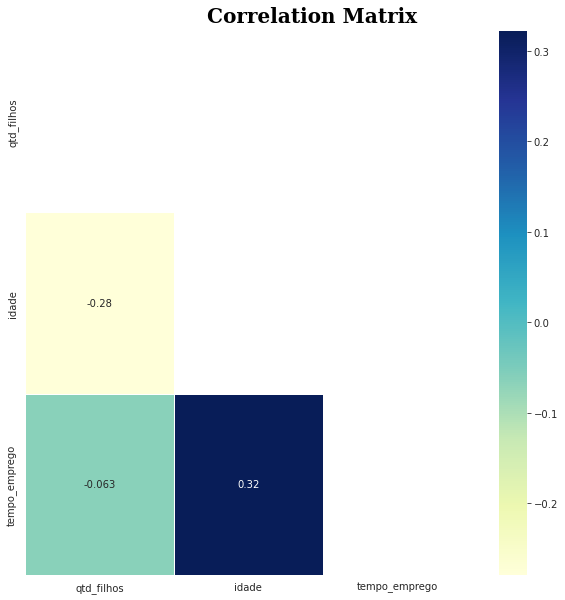

In [16]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.225,-0.05, 'Correlation Matrix', fontsize=20, fontweight='bold', fontfamily='serif', color='#000000')
sns.heatmap(data_corr,mask=mask, annot=True, linewidths=.5, cmap='YlGnBu')


#### 3.2.3 Scatterplot relacionando Tempo de Emprego X Renda de acordo com o Sexo

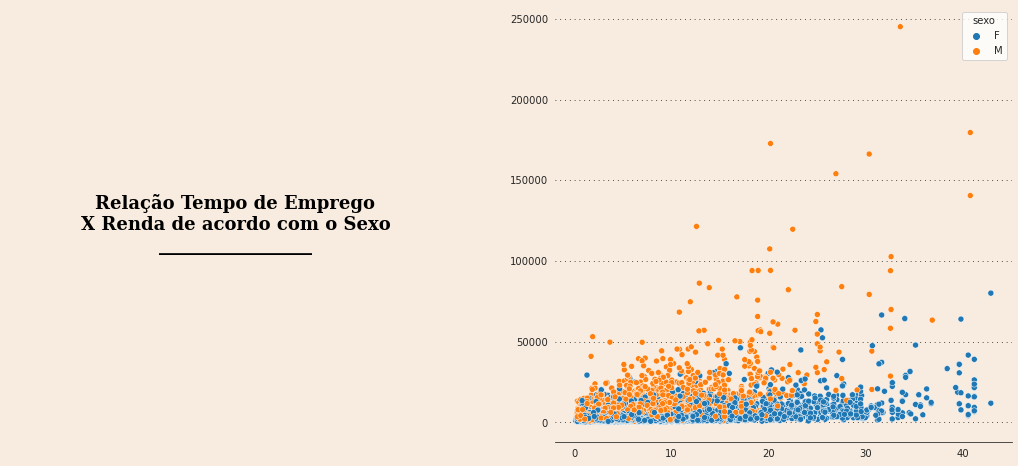

In [17]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Relação Tempo de Emprego\nX Renda de acordo com o Sexo\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1, x='tempo_emprego', y='renda', hue='sexo' ,data=df)
ax1.set_xlabel('')
ax1.set_ylabel('')
lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

#### 3.2.4 Scatterplot relacionando Idade X Renda de acordo com o Sexo

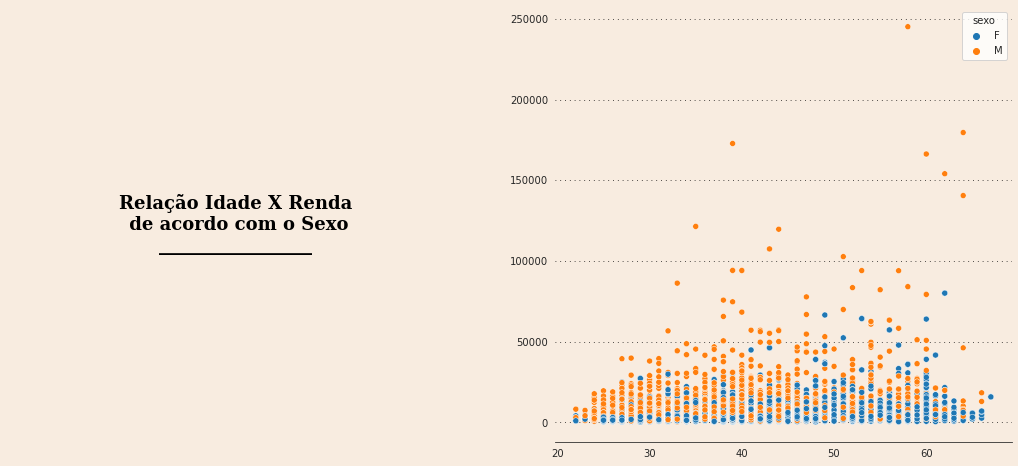

In [18]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Relação Idade X Renda\n de acordo com o Sexo\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1, x='idade', y='renda', hue='sexo' ,data=df)
ax1.set_xlabel('')
ax1.set_ylabel('')
lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

#### 3.2.6 Média da <code>renda</code> por <code>escolaridade</code>

In [19]:
renda_tipo_educacao = df.groupby('educacao')[['renda']].mean().round(2)

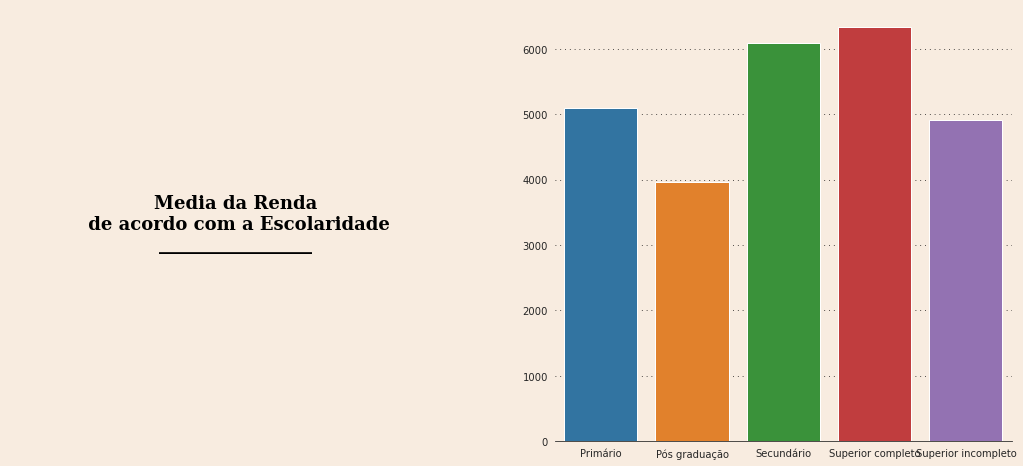

In [20]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Media da Renda\n de acordo com a Escolaridade\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax1, x=renda_tipo_educacao.index, y=renda_tipo_educacao.renda)
ax1.set_xlabel('')
ax1.set_ylabel('')
lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

#### 3.2.7 A <code>renda</code> atraveś do tempo.

In [21]:
label = df.groupby('data_ref')[['renda']].mean().index
label

Index(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
       '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01'],
      dtype='object', name='data_ref')

/tmp/ipykernel_6222/3243435725.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=label, rotation = 45)


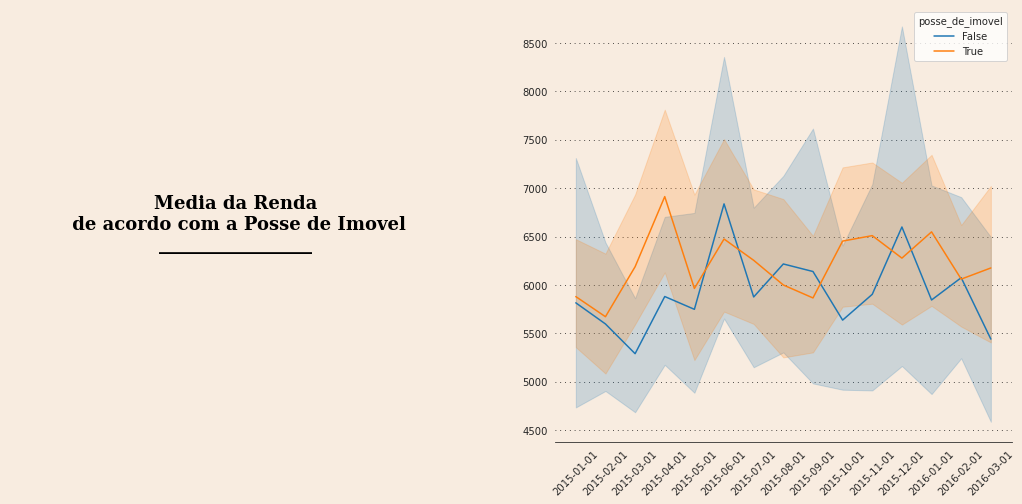

In [22]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Media da Renda\n de acordo com a Posse de Imovel\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data=df, x='data_ref', y='renda', hue='posse_de_imovel')
ax1.set_xticklabels(labels=label, rotation = 45)
ax1.set_xlabel('')
ax1.set_ylabel('')
lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

/tmp/ipykernel_6222/2958416329.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=label, rotation = 45)


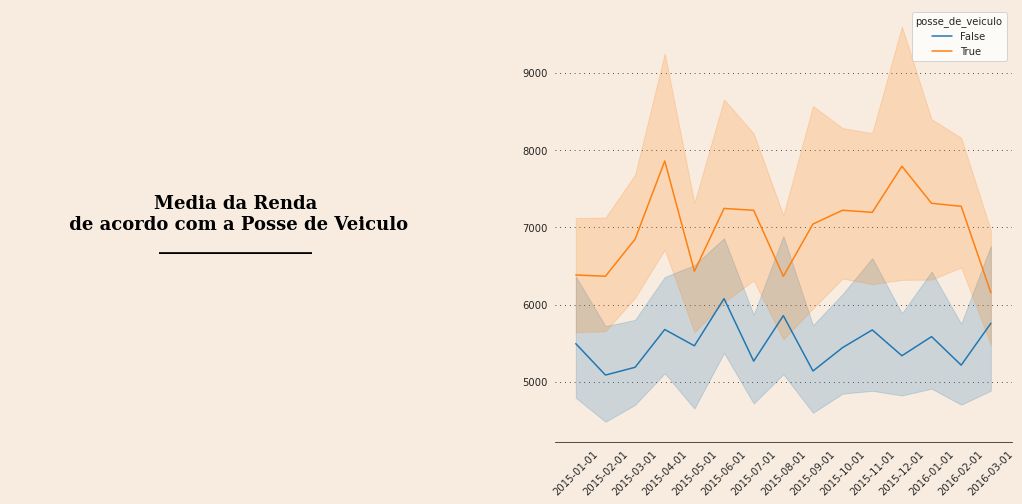

In [23]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Media da Renda\n de acordo com a Posse de Veiculo\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data=df, x='data_ref', y='renda', hue='posse_de_veiculo')
ax1.set_xticklabels(labels=label, rotation = 45)
ax1.set_xlabel('')
ax1.set_ylabel('')
lista = ["top","right","left"]
ax1.spines[lista].set_visible(False)

#### 3.2.8 Próxima etapa

<p>Feita algumas análises sobre os dados, chegou a hora de iniciar o processo de <b>Machine Learning</b>.</p>

## 4. Preparação dos Dados <a id=11></a>
[back to top](#18)

### 4.1 Selecionando as variáveis<a id=12></a>

#### 4.1.1 Visualizando as variáveis

In [24]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### <p> 4.1.2 Inicialmente podemos descartar as variáveis <code>data_ref</code>, <code>id_cliente</code> onde as mesmas, não tem um impacto direto na variável resposta <code>renda</code></p>

In [25]:
df = df.drop(columns=['data_ref', 'id_cliente'])
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


<b><p>4.1.3  As variáveis <code>idade</code>, <code>tempo_emprego</code>, se encontram em escalas diferentes, para garantir melhor acurácia do nosso modelo, vamos normaliza-las.</p></b>

In [26]:
sc = StandardScaler()

df[['idade', 'tempo_emprego']] = sc.fit_transform(df[['idade', 'tempo_emprego']])
df[['idade', 'tempo_emprego']].head(2)

,idade,tempo_emprego
0,-1.562485,-0.166877
1,-1.349534,-0.080328


<p><b>Com as variáveis normalizadas, precisamos agora deixar todos os valores numéricos, criando <code>Dummies</code>, os modelos de Machine Learning, não entendem Strings.</b></p>

In [27]:
df['sexo'] = df['sexo'].map({'F' : 0, 'M' : 1})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({False : 0, True : 1})
df['posse_de_imovel'] = df['posse_de_imovel'].map({False : 0, True : 1})

In [28]:
df = pd.get_dummies(df)
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,0,0,1,0,-1.562485,-0.166877,1.0,8060.34,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,1,1,0,-1.349534,-0.080328,2.0,1852.15,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0,1,1,0,-0.604204,-1.025832,2.0,2253.89,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,1,1,-1.136582,-0.428564,3.0,6600.77,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1,1,0,0,-0.817156,-0.511030,1.0,6475.97,1,...,0,1,0,0,0,0,0,0,0,1


<p><b>4.1.4 Com tudo pronto, vamos dividir nosso <code>dataframe</code> em Treino e Teste</b></p>

In [29]:
X = df.drop(columns=['Unnamed: 0', 'renda'], axis=1)
y = df.renda

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
X_train.shape

(9941, 28)

In [32]:
X_test.shape

(2486, 28)

In [33]:
y_train.shape

(9941,)

In [34]:
y_test.shape

(2486,)

## 5. Modelagem <a id=13></a>
[back to top](#18)

### 5.1 Regressão Linear Múltipla <a id=14></a>

#### 5.1.1 Treinando o modelo

In [35]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg

LinearRegression()

#### 5.1.2 Predizendo com os dados de teste

In [36]:
ypred = lin_reg.predict(X_test)

#### 5.1.3 Obtendo o R²

In [37]:
R2_lin = r2_score(y_test, ypred)
print(R2_lin)

0.2643103297181124


#### 5.1.4 Obtendo o R² ajustado

In [38]:
def adjusted_r2(y_test, ypred,X_train):    
    adj_r2 = (1 - ((1 - r2_score(y_test, ypred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
    return adj_r2

adjusted_r2_lin = adjusted_r2(y_test, ypred, X_train)
adjusted_r2_lin

0.25592640185165216

### 5.2 Random Forest <a id=15></a>

#### 5.2.1 Treinando o modelo

In [39]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

#### 5.2.2 Predizendo com os dados de teste

In [40]:
ypred = regressor.predict(X_test)

#### 5.2.3 Obtendo o R²

In [42]:
R2_ranfor = r2_score(y_test, ypred)
print(R2_ranfor)

0.47053106074402684


#### 5.2.4 Obtendo o R² ajustado

In [43]:
def adjusted_r2(y_test, ypred,X_train):    
    adj_r2 = (1 - ((1 - r2_score(y_test, ypred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
    return adj_r2

adjusted_r2_ranfor = adjusted_r2(y_test, ypred, X_train)
adjusted_r2_ranfor

0.46449722667843174

#### 5.2.5 Obtendo o Erro Percentual Absoluto Médio (MAPE)

In [44]:
MAPE = np.mean(np.abs((y_test - ypred) / y_test)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 75.384708533743


## 6.Avaliação dos resultados <a id=16></a>
[back to top](#18)

### 6.1 Resultados <a id=17></a>

In [45]:
print('Regressão Linear Múltipla:')
print('')
print(f'R² foi de: {R2_lin}')
print(f'R² ajustado foi de: {adjusted_r2_lin}')
print(50*'-')
print('')
print('Random Forest')
print('')
print(f'R² foi de: {R2_ranfor}')
print(f'R² ajustado foi de: {adjusted_r2_ranfor}')

Regressão Linear Múltipla:

R² foi de: 0.2643103297181124
R² ajustado foi de: 0.25592640185165216
--------------------------------------------------

Random Forest

R² foi de: 0.47053106074402684
R² ajustado foi de: 0.46449722667843174


### 6.2 Avaliação <a id=19></a>

### Com as métricas obtidas é possível definir qual modelo teve um desempenho melhor, devido a baixa correlação entre os dados, os modelos não tiveram um ótimo desempenho. Random Forest teve um aproveitamento melhor, ficando com R²=0.46.